<a href="https://colab.research.google.com/github/neurosxx/dsc-phase-2-project-v3/blob/main/movie_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Business Understanding

In this project, we wil be looking at multiple movie datasets to determine which type of films are presently leading at the box office.  Then, this conclusion will assist a new studio to emulate the most profitable film types.

[insert researched info here]

# Data Understanding
To obtain more infomration relevant to films, a dataset from  will be utilized

**Limitations**

This data is only focused on movies, therefore it is not able to be generalized to the entire entertainment industry.  Further, as the dataset only contains the total gross, it will not incldue the costs of creating the movies. Finally, The dataset only looks at box office revenue, which means that the total revenue ( from streaming sites or other sources) may be higher.

# Data Preparation

Initally, we will import packages required to analyze the data. Next, we will incorporate our datasets and become familiarized with the data.



In [1]:
# Providing necessary databases
import warnings
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sqlite3 as sql
import zipfile
%matplotlib inline
warnings.filterwarnings('ignore')

In [2]:
!wget https://github.com/learn-co-curriculum/dsc-phase-2-project-v3/raw/refs/heads/main/zippedData/im.db.zip
! unzip im.db.zip -d data


--2024-12-21 00:05:53--  https://github.com/learn-co-curriculum/dsc-phase-2-project-v3/raw/refs/heads/main/zippedData/im.db.zip
Resolving github.com (github.com)... 140.82.113.3
Connecting to github.com (github.com)|140.82.113.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/learn-co-curriculum/dsc-phase-2-project-v3/refs/heads/main/zippedData/im.db.zip [following]
--2024-12-21 00:05:54--  https://raw.githubusercontent.com/learn-co-curriculum/dsc-phase-2-project-v3/refs/heads/main/zippedData/im.db.zip
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.109.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 67149708 (64M) [application/zip]
Saving to: ‘im.db.zip’

im.db.zip           100%[===================>]  64.04M   118MB/s    in 0.5s    

2024-12-2

In [3]:
# create connection to the database and cursor object:
conn = sql.connect('data/im.db')
cur = conn.cursor()

# find table names
cur.execute(""" SELECT name
                FROM sqlite_master
                WHERE type = 'table';""")

# fetch result and store it in names_table
names_table= cur.fetchall()
names_table

[('movie_basics',),
 ('directors',),
 ('known_for',),
 ('movie_akas',),
 ('movie_ratings',),
 ('persons',),
 ('principals',),
 ('writers',)]

In [4]:
df_movie_budget = pd.read_csv('https://github.com/learn-co-curriculum/dsc-phase-2-project-v3/raw/refs/heads/main/zippedData/tn.movie_budgets.csv.gz')

In [5]:
df_movie_budget
#seperate release_date into datetime object.
#Cross reference movie wit year to make sure titles that have same name are not counted as one movie.
# compare what matches up, then create a compound conditional. if it does match, append on data frame that doesn't have production budget.

# Production_budget is independent variable.- X axis
# Domestic_gross is dependent variable - Y axis

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"
...,...,...,...,...,...,...
5777,78,"Dec 31, 2018",Red 11,"$7,000",$0,$0
5778,79,"Apr 2, 1999",Following,"$6,000","$48,482","$240,495"
5779,80,"Jul 13, 2005",Return to the Land of Wonders,"$5,000","$1,338","$1,338"
5780,81,"Sep 29, 2015",A Plague So Pleasant,"$1,400",$0,$0


In [6]:
df_movie_budget['release_date'].value_counts()

,count
release_date,
"Dec 31, 2014",24
"Dec 31, 2015",23
"Dec 31, 2010",15
"Dec 31, 2008",14
"Dec 31, 2009",13
...,...
"Oct 21, 1977",1
"Jun 23, 2009",1
"Sep 26, 2017",1


In [7]:
df_movie_budget['release_date'] = pd.to_datetime(df_movie_budget['release_date'])

In [8]:
df_movie_budget['release_year'] = df_movie_budget['release_date'].dt.year

In [9]:
duplicated_movies = df_movie_budget.loc[df_movie_budget['movie'].duplicated(keep=False) == True].sort_values('movie', ascending=True)
# looking for next step: where
duplicated_movies.describe()

,id,release_date,release_year
count,165.000000,165,165.000000
mean,53.072727,1997-04-18 21:49:05.454545408,1996.769697
min,1.000000,1915-02-08 00:00:00,1915.000000
25%,31.000000,1986-04-18 00:00:00,1986.000000
50%,55.000000,2005-07-08 00:00:00,2005.000000
75%,76.000000,2013-02-08 00:00:00,2013.000000
max,100.000000,2019-06-14 00:00:00,2019.000000
std,28.317357,NaN,21.622770


In [10]:
duplicated_movies.info()

<class 'pandas.core.frame.DataFrame'>
Index: 165 entries, 4270 to 302
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   id                 165 non-null    int64         
 1   release_date       165 non-null    datetime64[ns]
 2   movie              165 non-null    object        
 3   production_budget  165 non-null    object        
 4   domestic_gross     165 non-null    object        
 5   worldwide_gross    165 non-null    object        
 6   release_year       165 non-null    int32         
dtypes: datetime64[ns](1), int32(1), int64(1), object(4)
memory usage: 9.7+ KB


In [12]:
# duplicated_movies.drop(df_movie_budget.index == 65, inplace=True)
# 50:101 one of Home needs deleted.
#100:150 #were good


# Check movie name & year, and check where movie and year are a match. Do it in the original dataframe.
# go through & look by doing df_movie_budget [0:50], [51:100] (make sure it doesn't become truncated), delete where there is duplicate!

In [13]:
duplicated_movies[65:66]
# SAME! - make sure to delete this.

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,release_year
3455,56,2009-06-05,Home,"$12,000,000",$0,$0,2009


In [14]:
numeric_columns = ['production_budget', 'domestic_gross', 'worldwide_gross']


In [15]:
for column in numeric_columns:
    duplicated_movies[column] = duplicated_movies[column].str.replace('$', '').str.replace(',', '').astype(float)
  # only 165 values displayed, need to troubleshoot
  # Have duplicate code, need to figure out which is preferable to use.

In [16]:
duplicated_movies[numeric_columns] = duplicated_movies[numeric_columns].astype(float)
# changing only specific columns to floats

In [17]:
print(duplicated_movies['production_budget'].describe())

count    1.650000e+02
mean     4.073306e+07
std      5.251290e+07
min      5.000000e+04
25%      5.800000e+06
50%      1.800000e+07
75%      5.500000e+07
max      2.250000e+08
Name: production_budget, dtype: float64


In [18]:
duplicated_movies.info()

<class 'pandas.core.frame.DataFrame'>
Index: 165 entries, 4270 to 302
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   id                 165 non-null    int64         
 1   release_date       165 non-null    datetime64[ns]
 2   movie              165 non-null    object        
 3   production_budget  165 non-null    float64       
 4   domestic_gross     165 non-null    float64       
 5   worldwide_gross    165 non-null    float64       
 6   release_year       165 non-null    int32         
dtypes: datetime64[ns](1), float64(3), int32(1), int64(1), object(1)
memory usage: 13.7+ KB


<Axes: xlabel='production_budget', ylabel='domestic_gross'>

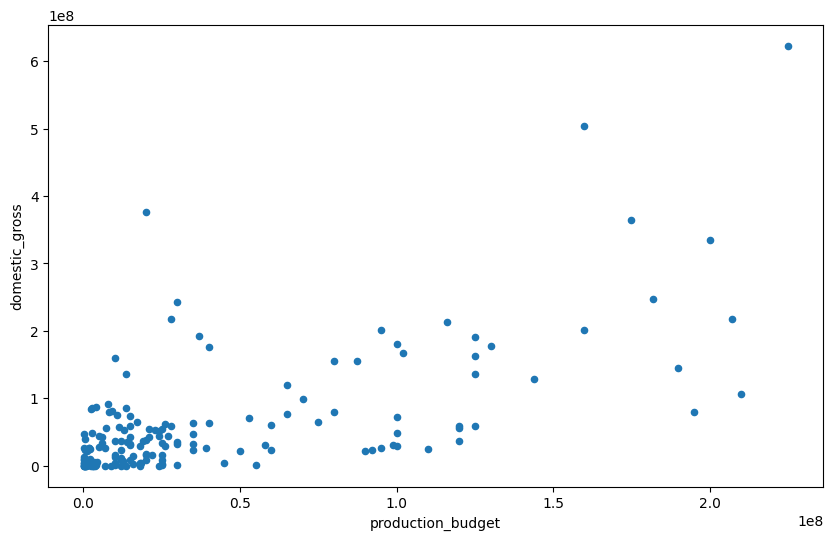

In [19]:
duplicated_movies.plot(kind='scatter', x='production_budget', y='domestic_gross', figsize=(10, 6))

<Axes: xlabel='production_budget', ylabel='worldwide_gross'>

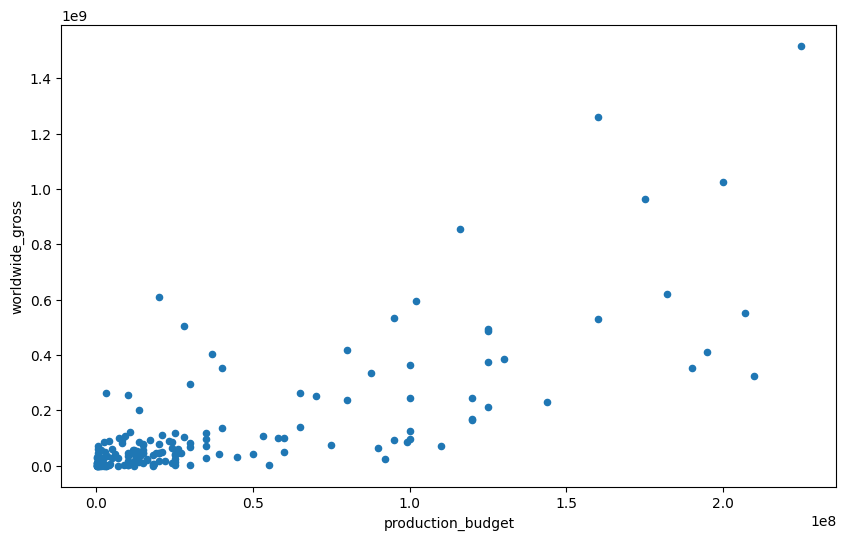

In [20]:
duplicated_movies.plot(kind='scatter', x='production_budget', y='worldwide_gross', figsize=(10, 6))

In [21]:
# !unzip im.db.zip -d data

In [22]:
zip_file_path = 'im.db.zip'
destination_folder = 'data/'

with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall(destination_folder)

# Go to repo and paste in raw

In [23]:
df_movie_gross = pd.read_csv('https://github.com/learn-co-curriculum/dsc-phase-2-project-v3/raw/refs/heads/main/zippedData/bom.movie_gross.csv.gz')
# df_movie gross columns =  title, studio, domesticGross, foreignGross, Year

In [24]:
df_movie_gross.head()
# This is bom.movie_gross.csv.gz

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010


In [25]:
# df_movie_gross.apply()
# use this to apply the function made further below

In [26]:
df_movie_gross['studio'].value_counts()[:50]
df_movie_gross['studio'] = df_movie_gross['studio'].replace('FoxS', 'Fox')
df_movie_gross['studio'] = df_movie_gross['studio'].replace('WB (NL)', 'WB')
# Replaces studio names to be uniformally named

In [27]:
df_movie_gross['studio'].value_counts().head()

,count
studio,
Fox,203
WB,185
IFC,166
Uni.,147
Magn.,136


In [28]:
# def calculate_roi(initial_investment, final_value):
#   # Formula for calculating ROI:
#   # ROI = ((Final_value = initial_investment) / initial_investment) * 100
#   roi = ((final_value - initial_investment) / initial_investment) * 100

#   return roi

# print("Welcome to the Return on Investment (ROI) Calculator!")

# initial_investment = float(input("Please enter the initial investment amount (S): "))
# final_value = float(input("Enter the final value of the investment (#): "))

# roi = calculate_roi(initial_investment, final_value)



In [30]:
 #Convert 'worldwide_gross' and 'production_budget' to numeric
for column in ['worldwide_gross', 'production_budget']:
    df_movie_budget[column] = df_movie_budget[column].str.replace('$', '').str.replace(',', '').astype(float)

In [31]:
# Creating ROI column in df_movie_budget
df_movie_budget['Roi'] = ((df_movie_budget['worldwide_gross'] - df_movie_budget['production_budget']) / df_movie_budget['production_budget']) * 100

In [ ]:
df_movie_gross['foreign_gross'] = pd.to_numeric(df_movie_gross['foreign_gross'], errors='coerce')
df_movie_gross['domestic_gross'] = pd.to_numeric(df_movie_gross['domestic_gross'], errors='coerce')

# Now perform the addition
Gross = df_movie_gross['foreign_gross'] + df_movie_gross['domestic_gross']

In [ ]:
df_movie_gross.isnull().sum()

In [ ]:
df_movie_gross.dropna(subset=['studio', 'domestic_gross', 'foreign_gross'], inplace=True)

In [ ]:
df_movie_gross.isnull().sum()

In [ ]:
universal_studio = df_movie_gross[df_movie_gross['studio'] == 'Uni.']

In [ ]:
universal_studio.head()

In [ ]:
db_path = destination_folder + 'im.db'

In [ ]:
# conn = sqlite3.connect(db_path)
# cursor = conn.cursor()

In [ ]:
# creating imbd_movie_basics dataframe
imbd_movie_basics = pd.read_sql_query("""
SELECT *
FROM movie_basics
LIMIT 10;
""", conn)
imbd_movie_basics


In [ ]:
# creating a dataframe for the directors table
imbd_directors = pd.read_sql_query("""
SELECT *
FROM directors
LIMIT 10;
""", conn)
imbd_directors

In [ ]:
# getting data & creating the dataframe for the known_for table
imbd_known_for = pd.read_sql_query("""
SELECT *
FROM known_for
LIMIT 10;
""", conn)
imbd_known_for

In [ ]:
# creating the dataframe for the movie_akas table
imbd_movie_akas = pd.read_sql_query("""
SELECT *
FROM movie_akas
LIMIT 10;
""", conn)
imbd_movie_akas

In [ ]:
# creating the dataframe for the movie_ratings (from imbd) table
df_movie_ratings = pd.read_sql_query("""
SELECT *
FROM movie_ratings
LIMIT 10;
""", conn)
df_movie_ratings

In [ ]:
# creating the dataframe for the persons table
imbd_persons = pd.read_sql_query("""
SELECT *
FROM persons
LIMIT 10;
""", conn)
imbd_persons

In [ ]:
# creating the dataframe for the principals table
imbd_principals = pd.read_sql_query("""
SELECT *
FROM principals
LIMIT 10;
""", conn)
imbd_principals

In [ ]:
# creating the dataframe for the writers table
imbd_writers = pd.read_sql_query("""
SELECT *
FROM writers
LIMIT 10;
""", conn)
imbd_writers

**Box Office MOJO (BOM) Dataset**

Intitally, we will create and read the BOM dataframe. After this, we will clean column value types for the BOM dataset (bom_df).

In [ ]:
 # Creating the data & checking the columns' data types
df_movie_gross = pd.read_csv('https://github.com/learn-co-curriculum/dsc-phase-2-project-v3/raw/refs/heads/main/zippedData/bom.movie_gross.csv.gz')
print(df_movie_gross.dtypes)

# Removing commas before we make transformations
df_movie_gross['foreign_gross'] = df_movie_gross['foreign_gross'].str.replace(',', '')

# transforming string object into a float
df_movie_gross = df_movie_gross.astype({'foreign_gross': 'float'})

# transforming string object into a float
df_movie_gross = df_movie_gross.astype({'domestic_gross': np.float64})

# Check to see if transformation was successful
print(df_movie_gross.dtypes)

# Check to see number of Null values in 'foreign_gross' column
print(f"  Number of Null values in 'foreign_gross' column: {df_movie_gross['foreign_gross'].isnull().sum()}")

# Check to see number of null values in 'title' column
print(f"  Number of Null values in 'title' column: {df_movie_gross['title'].isnull().sum()}")

# drop rows with Null values in 'foreign_gross' and 'title' columns
df_movie_gross.dropna(subset=['foreign_gross', 'domestic_gross', 'studio', 'title'], inplace=True)

# check for NaN values in 'foreign_gross and 'title'
print(f"  Number of NaN values in 'foreign_gross' column: {df_movie_gross['foreign_gross'].isna().sum()}")
# df_movie gross columns =  title, studio, domesticGross, foreignGross, Year

In [ ]:
df_movie_basics.dropna(subset=['runtime_minutes'], inplace=True)

**Questions about the Data & Data Analysis**

Is there a relationship between actors and higher grossing flims?
Do movies with increased average ratings result inhigher grossing films?
Do certain genres result in higher grossing films?

# Exploratory Data Analysis

In [ ]:
# Your code here - remember to use markdown cells for comments as well!
df = pd.head()